# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import scipy


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import KMeans, DBSCAN

import pickle

In [2]:
data = pd.read_csv('Sub_Telco_Encoded_with_ID.csv')

In [3]:
data.columns

Index(['Customer ID', 'Monthly Purchase (Thou. IDR)',
       'CLTV (Predicted Thou. IDR)', 'Tenure Months', 'Device Class',
       'Education Product_No internet service', 'Education Product_Yes',
       'Call Center_Yes', 'Music Product_No internet service',
       'Music Product_Yes', 'Use MyApp_No internet service', 'Use MyApp_Yes',
       'Location_Jakarta', 'Games Product_No internet service',
       'Games Product_Yes', 'Video Product_No internet service',
       'Video Product_Yes', 'Payment Method_Debit',
       'Payment Method_Digital Wallet', 'Payment Method_Pulsa', 'Churn Label'],
      dtype='object')

In [4]:
#df = data[['CLTV (Predicted Thou. IDR)', 'Tenure Months', 'Monthly Purchase (Thou. IDR)', 'Device Class']]

In [5]:
#df = data[['Tenure Months', 'Device Class']]

In [6]:
df = data[['Tenure Months', 'Monthly Purchase (Thou. IDR)']]

In [7]:
# df = data[['CLTV (Predicted Thou. IDR)', 'Tenure Months', 'Monthly Purchase (Thou. IDR)', 'Device Class',
#           'Payment Method_Debit', 'Payment Method_Digital Wallet', 'Payment Method_Pulsa']]

# Visualize Raw Data

Text(0.5, 1.0, 'Visualization of raw data')

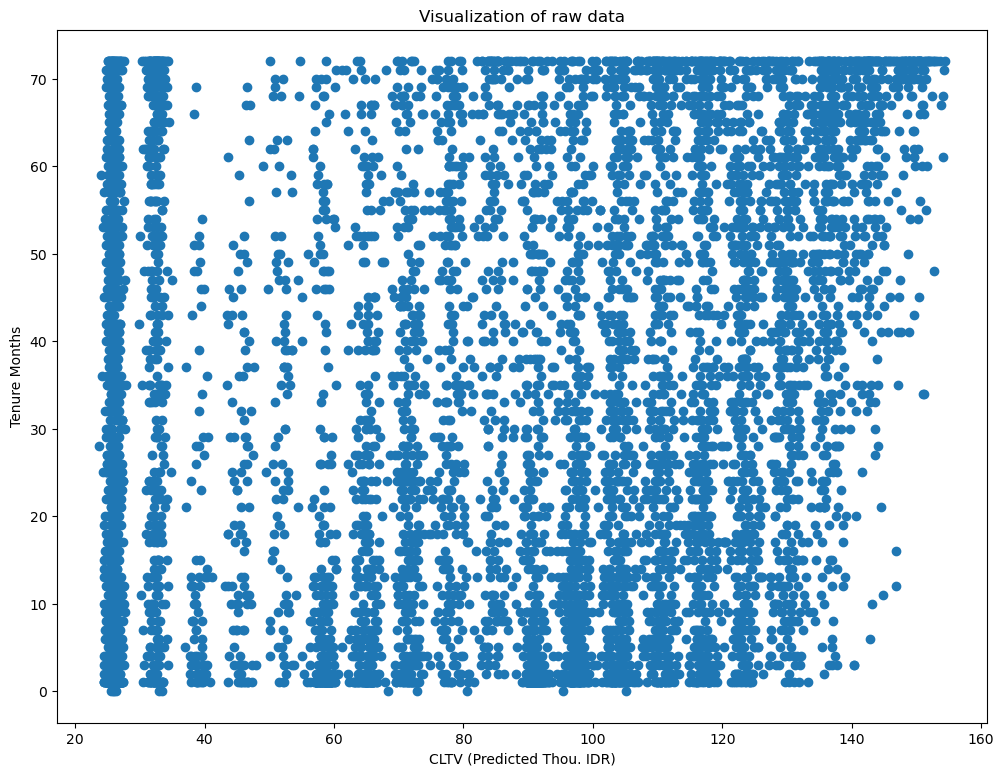

In [8]:
plt.figure(figsize = (12, 9))
plt.scatter(df['Monthly Purchase (Thou. IDR)'], df['Tenure Months'])
plt.xlabel('CLTV (Predicted Thou. IDR)')
plt.ylabel('Tenure Months')
plt.title('Visualization of raw data')

# Modeling

## Standarization

In [9]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df)

In [10]:
# Perform Hierarchical Clustering. The results are returned as a linkage matrix. 
hier_clust = linkage(segmentation_std)

## Dendogram

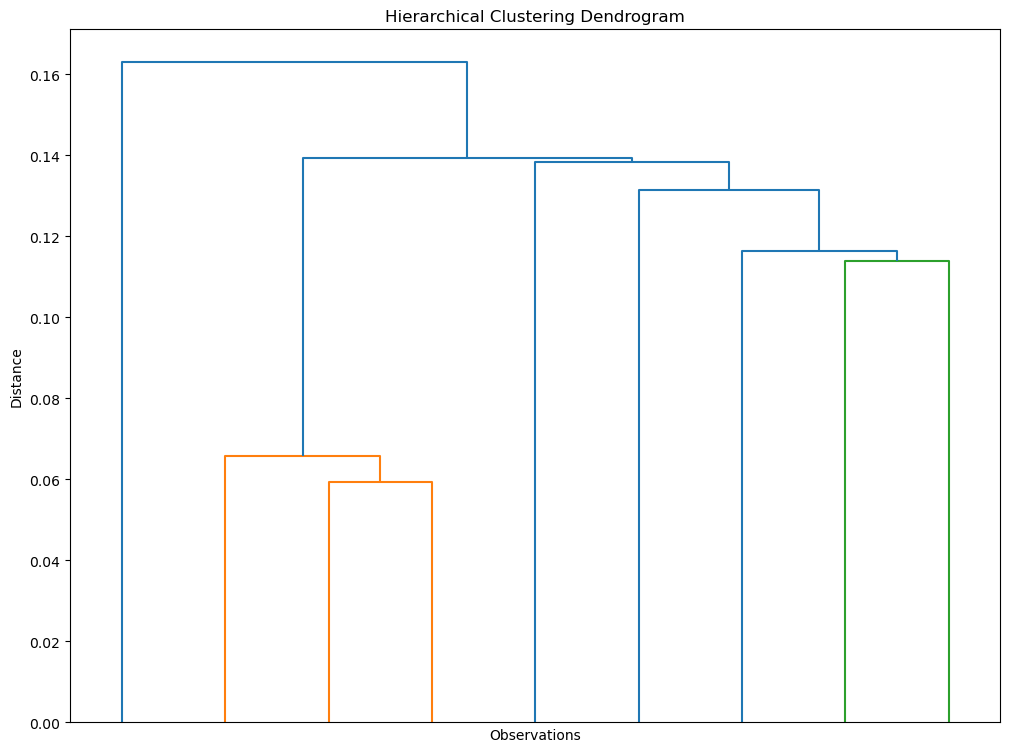

In [11]:
# We plot the results from the Hierarchical Clustering using a Dendrogram. 
# We truncate the dendrogram for better readability. 
# We also omit showing the labels for each point.
plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode = 'level', 
           p = 5, 
           show_leaf_counts = False, 
           no_labels = True)
plt.show()

## Elbow Method

In [12]:
# Perform K-means clustering. We consider 1 to 10 clusters, so our for loop runs 10 iterations.
# In addition we run the algortihm at many different starting points - k means plus plus. 
# And we set a random state for reproducibility.
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)

C:\Users\ASUS\anaconda3\envs\loan_prediction_env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\anaconda3\envs\loan_prediction_env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\anaconda3\envs\loan_prediction_env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\anaconda3\envs\loan_prediction_env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: Fut

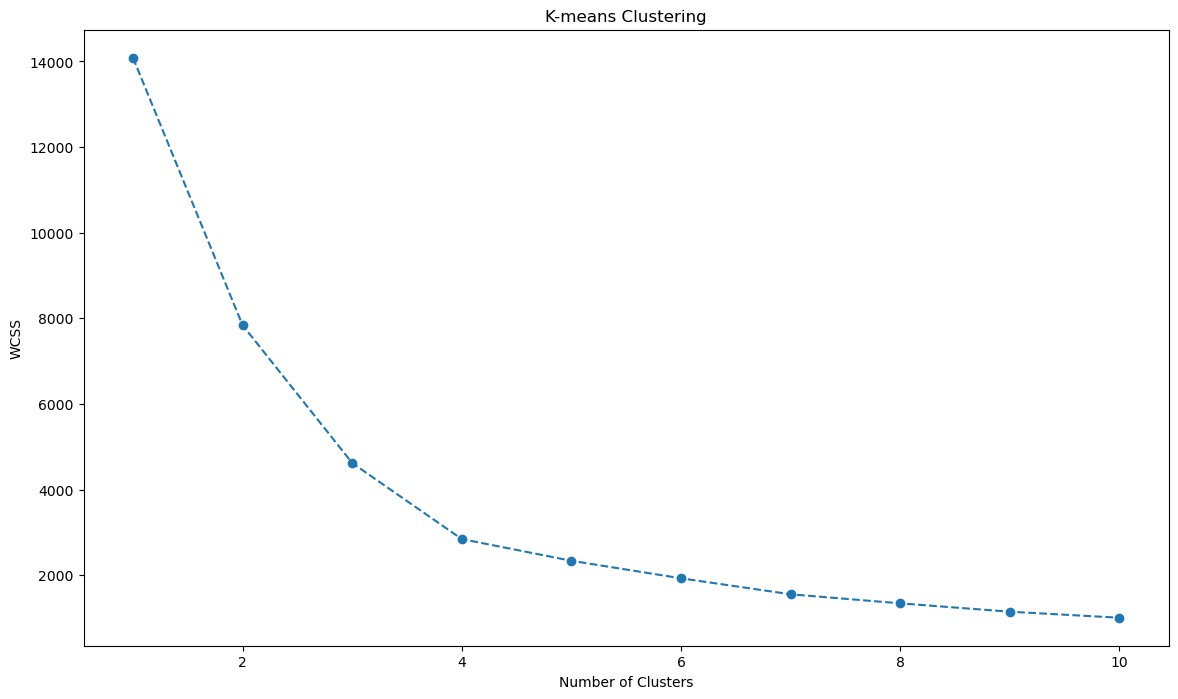

In [13]:
# Plot the Within Cluster Sum of Squares for the different number of clusters.
# From this plot we choose the number of clusters. 
# We look for a kink in the graphic, after which the descent of wcss isn't as pronounced.
plt.figure(figsize = (14,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

## Clustering with 3 Clusters.

### KMeans

In [14]:
kmeans = KMeans(n_clusters =4, init = 'k-means++', random_state = 42)
# We divide our data into the four clusters.
kmeans.fit(segmentation_std)

C:\Users\ASUS\anaconda3\envs\loan_prediction_env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

In [15]:
# We create a new data frame with the original features and add a new column with the assigned clusters for each point.
df_segm_kmeans = df.copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_
# Calculate mean values for the clusters
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

Tenure Months  Monthly Purchase (Thou. IDR)
Segment K-means                                             
0                    14.811252                    105.580674
1                    54.115152                     44.237368
2                    10.487875                     42.211908
3                    58.748975                    120.925507

In [16]:
# Compute the size and proportions of the four clusters
# df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment K-means','CLTV (Predicted Thou. IDR)']].groupby(['Segment K-means']).count()
# df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs'] / df_segm_analysis['N Obs'].sum()
# df_segm_analysis

In [17]:
# Compute the size and proportions of the four clusters
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment K-means','Tenure Months']].groupby(['Segment K-means']).count()
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs'] / df_segm_analysis['N Obs'].sum()
df_segm_analysis

Tenure Months  Monthly Purchase (Thou. IDR)  N Obs  Prop Obs
Segment K-means                                                              
0                    14.811252                    105.580674   2204  0.312935
1                    54.115152                     44.237368   1155  0.163993
2                    10.487875                     42.211908   1732  0.245918
3                    58.748975                    120.925507   1952  0.277155

In [18]:
df_segm_analysis.columns

Index(['Tenure Months', 'Monthly Purchase (Thou. IDR)', 'N Obs', 'Prop Obs'], dtype='object')

In [19]:
data.columns

Index(['Customer ID', 'Monthly Purchase (Thou. IDR)',
       'CLTV (Predicted Thou. IDR)', 'Tenure Months', 'Device Class',
       'Education Product_No internet service', 'Education Product_Yes',
       'Call Center_Yes', 'Music Product_No internet service',
       'Music Product_Yes', 'Use MyApp_No internet service', 'Use MyApp_Yes',
       'Location_Jakarta', 'Games Product_No internet service',
       'Games Product_Yes', 'Video Product_No internet service',
       'Video Product_Yes', 'Payment Method_Debit',
       'Payment Method_Digital Wallet', 'Payment Method_Pulsa', 'Churn Label'],
      dtype='object')

In [20]:
# We create a new data frame with the original features and add a new column with the assigned clusters for each point.
df_segm_kmeans_extend = df.copy()
df_segm_kmeans_extend['Segment K-means'] = kmeans.labels_

df_segm_kmeans_extend = pd.concat([df_segm_kmeans, data[['CLTV (Predicted Thou. IDR)', 'Device Class', 'Churn Label']]], axis=1)
df_segm_kmeans_extend.head(3)

Tenure Months  Monthly Purchase (Thou. IDR)  Segment K-means  \
0              2                        70.005                2   
1              2                        91.910                0   
2              8                       129.545                0   

   CLTV (Predicted Thou. IDR)  Device Class  Churn Label  
0                      4210.7             1            1  
1                      3511.3             2            1  
2                      6983.6             2            1

In [21]:
df_segm_analysis_extend = df_segm_kmeans_extend.groupby(['Segment K-means']).mean()
df_segm_analysis_extend

Tenure Months  Monthly Purchase (Thou. IDR)  \
Segment K-means                                                
0                    14.811252                    105.580674   
1                    54.115152                     44.237368   
2                    10.487875                     42.211908   
3                    58.748975                    120.925507   

                 CLTV (Predicted Thou. IDR)  Device Class  Churn Label  
Segment K-means                                                         
0                               5225.338203      1.783575     0.491833  
1                               6181.314286      0.425108     0.047619  
2                               5250.460566      0.502309     0.245381  
3                               6423.569057      1.701332     0.156250

In [22]:
# Compute the size and proportions of the four clusters
df_segm_analysis_extend['N Obs'] = df_segm_kmeans_extend[['Segment K-means','Tenure Months']].groupby(['Segment K-means']).count()
df_segm_analysis_extend['Prop Obs'] = df_segm_analysis_extend['N Obs'] / df_segm_analysis_extend['N Obs'].sum()
df_segm_analysis_extend.rename(index={0: 'Early-Spender Customers', 1:'Stay-Observer Customers', 2:'Early Observer Customers', 3: 'Stay-Spender Customers'})

Tenure Months  Monthly Purchase (Thou. IDR)  \
Segment K-means                                                         
Early-Spender Customers       14.811252                    105.580674   
Stay-Observer Customers       54.115152                     44.237368   
Early Observer Customers      10.487875                     42.211908   
Stay-Spender Customers        58.748975                    120.925507   

                          CLTV (Predicted Thou. IDR)  Device Class  \
Segment K-means                                                      
Early-Spender Customers                  5225.338203      1.783575   
Stay-Observer Customers                  6181.314286      0.425108   
Early Observer Customers                 5250.460566      0.502309   
Stay-Spender Customers                   6423.569057      1.701332   

                          Churn Label  N Obs  Prop Obs  
Segment K-means                                         
Early-Spender Customers      0.491833   2204  0.312935  
Stay-Observer Customers      0.047619   1155  0.163993  
Early Observer Customers     0.245381   1732  0.245918  
Stay-Spender Customers       0.156250   1952  0.277155

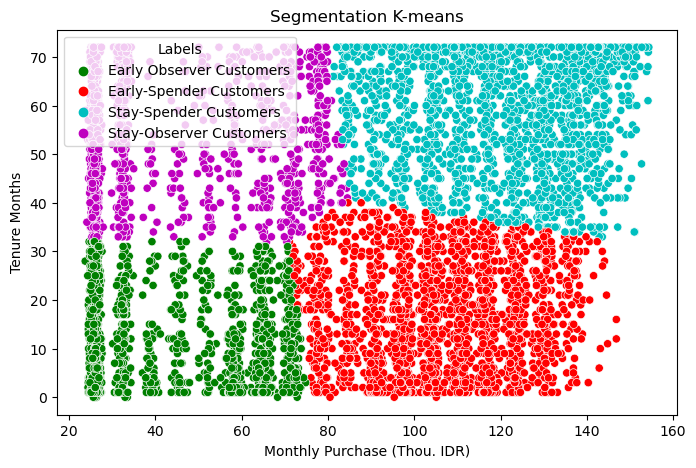

In [23]:
# Add the segment labels to our table
df_segm_kmeans_extend['Labels'] = df_segm_kmeans_extend['Segment K-means'].map({0: 'Early-Spender Customers', 1:'Stay-Observer Customers', 
                                                                                2:'Early Observer Customers', 3: 'Stay-Spender Customers'})


# We plot the results from the K-means algorithm. 
# Each point in our data set is plotted with the color of the clusters it has been assigned to.
x_axis = df_segm_kmeans_extend['Monthly Purchase (Thou. IDR)']
y_axis = df_segm_kmeans_extend['Tenure Months']
plt.figure(figsize = (8, 5))
sns.scatterplot(x=x_axis, y=y_axis, hue = df_segm_kmeans_extend['Labels'], palette = ['g', 'r', 'c', 'm'])
plt.title('Segmentation K-means')
plt.show()

In [24]:
df_segm_kmeans_extend.Labels.value_counts()

Early-Spender Customers     2204
Stay-Spender Customers      1952
Early Observer Customers    1732
Stay-Observer Customers     1155
Name: Labels, dtype: int64

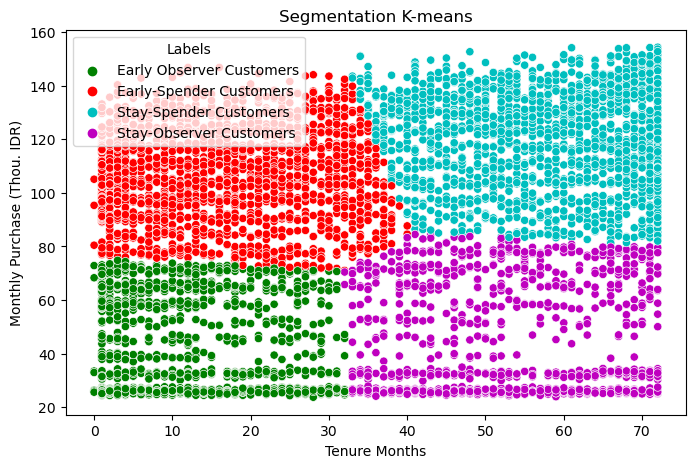

In [25]:
# We plot the results from the K-means algorithm. 
# Each point in our data set is plotted with the color of the clusters it has been assigned to.
x_axis = df_segm_kmeans_extend['Tenure Months']
y_axis = df_segm_kmeans_extend['Monthly Purchase (Thou. IDR)']
plt.figure(figsize = (8, 5))
sns.scatterplot(x=x_axis, y=y_axis, hue = df_segm_kmeans_extend['Labels'], palette = ['g', 'r', 'c', 'm'])
plt.title('Segmentation K-means')
plt.show()

In [26]:
import plotly.express as px
import plotly.graph_objects as go

In [27]:
fig = px.scatter_3d(df_segm_kmeans_extend, 
                    x='CLTV (Predicted Thou. IDR)',
                    y='Monthly Purchase (Thou. IDR)', 
                    z='Tenure Months', 
                    color='Labels')

# Adjust the marker size
fig.update_traces(marker=dict(size=3))  # Adjust 'size' as needed

# Set the overall plot size
fig.update_layout(width=1000, height=800)  # Adjust 'width' and 'height' as needed


fig.show()

In [28]:
fig = px.scatter_3d(df_segm_kmeans_extend, 
                    x='Churn Label',
                    y='Monthly Purchase (Thou. IDR)', 
                    z='Tenure Months', 
                    color='Labels')

# Adjust the marker size
fig.update_traces(marker=dict(size=3))  # Adjust 'size' as needed

# Set the overall plot size
fig.update_layout(width=1000, height=800)  # Adjust 'width' and 'height' as needed


fig.show()

In [29]:
fig = px.scatter_3d(df_segm_kmeans_extend, 
                    x='Tenure Months',
                    y='Churn Label', 
                    z='Monthly Purchase (Thou. IDR)', 
                    color='Labels')

# Adjust the marker size
fig.update_traces(marker=dict(size=3))  # Adjust 'size' as needed

# Set the overall plot size
fig.update_layout(width=1000, height=800)  # Adjust 'width' and 'height' as needed


fig.show()

In [30]:
fig = px.scatter_3d(df_segm_kmeans_extend, 
                    x='Device Class',
                    y='Monthly Purchase (Thou. IDR)', 
                    z='Tenure Months', 
                    color='Labels')

# Adjust the marker size
fig.update_traces(marker=dict(size=3))  # Adjust 'size' as needed

# Set the overall plot size
fig.update_layout(width=1000, height=800)  # Adjust 'width' and 'height' as needed


fig.show()

In [31]:
df_segm_kmeans.columns

Index(['Tenure Months', 'Monthly Purchase (Thou. IDR)', 'Segment K-means'], dtype='object')

In [33]:
data

Customer ID  Monthly Purchase (Thou. IDR)  CLTV (Predicted Thou. IDR)  \
0               0                        70.005                      4210.7   
1               1                        91.910                      3511.3   
2               2                       129.545                      6983.6   
3               3                       136.240                      6503.9   
4               4                       134.810                      6942.0   
...           ...                           ...                         ...   
7038         7038                        27.495                      6897.8   
7039         7039                       110.240                      2782.0   
7040         7040                       134.160                      7228.0   
7041         7041                        38.480                      3630.9   
7042         7042                       137.345                      6626.1   

      Tenure Months  Device Class  Education Product_No internet service  \
0                 2             1                                      0   
1                 2             2                                      0   
2                 8             2                                      0   
3                28             2                                      0   
4                49             2                                      0   
...             ...           ...                                    ...   
7038             72             0                                      1   
7039             24             1                                      0   
7040             72             2                                      0   
7041             11             1                                      0   
7042             66             2                                      0   

      Education Product_Yes  Call Center_Yes  \
0                         0                0   
1                         0                0   
2                         1                0   
3                         1                1   
4                         1                0   
...                     ...              ...   
7038                      0                0   
7039                      1                1   
7040                      1                0   
7041                      0                0   
7042                      1                1   

      Music Product_No internet service  Music Product_Yes  ...  \
0                                     0                  1  ...   
1                                     0                  0  ...   
2                                     0                  0  ...   
3                                     0                  0  ...   
4                                     0                  1  ...   
...                                 ...                ...  ...   
7038                                  1                  0  ...   
7039                                  0                  0  ...   
7040                                  0                  1  ...   
7041                                  0                  0  ...   
7042                                  0                  0  ...   

      Use MyApp_Yes  Location_Jakarta  Games Product_No internet service  \
0                 0                 1                                  0   
1                 0                 1                                  0   
2                 1                 1                                  0   
3                 1                 1                                  0   
4                 1                 1                                  0   
...             ...               ...                                ...   
7038              0                 1                                  1   
7039              1                 1                                  0   
7040              1                 1                                  0   
70

### Segment vs Payment Method

In [39]:
test = pd.concat([df_segm_kmeans_extend['Labels'], data['Payment Method_Pulsa']], axis=1)
test.head(5)

Labels  Payment Method_Pulsa
0  Early Observer Customers                     0
1   Early-Spender Customers                     1
2   Early-Spender Customers                     1
3   Early-Spender Customers                     1
4    Stay-Spender Customers                     0

<AxesSubplot:xlabel='count', ylabel='Labels'>

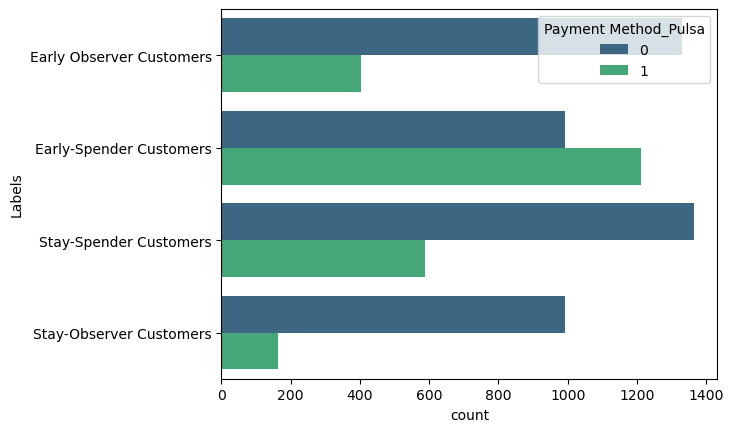

In [40]:
sns.countplot(y=test['Labels'], palette='viridis', hue=test['Payment Method_Pulsa'])

<AxesSubplot:ylabel='Labels'>

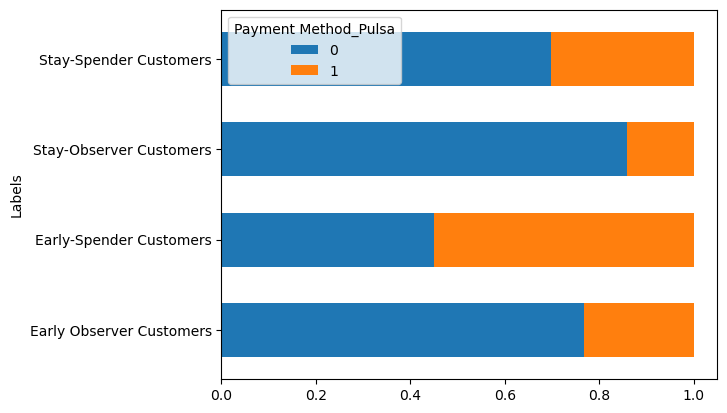

In [44]:
sbc = pd.crosstab(test['Labels'], test['Payment Method_Pulsa'])
sbc = sbc.div(sbc.sum(axis=1).astype(float), axis=0)
sbc.plot(kind='barh', stacked=True, width = 0.6)

### Segment vs Device Class

In [46]:
test = pd.concat([df_segm_kmeans_extend['Labels'], data['Device Class'].replace({0: 'Low', 1: 'Mid', 2:'High'})], axis=1)
test.head(5)

Labels Device Class
0  Early Observer Customers          Mid
1   Early-Spender Customers         High
2   Early-Spender Customers         High
3   Early-Spender Customers         High
4    Stay-Spender Customers         High

<AxesSubplot:xlabel='count', ylabel='Labels'>

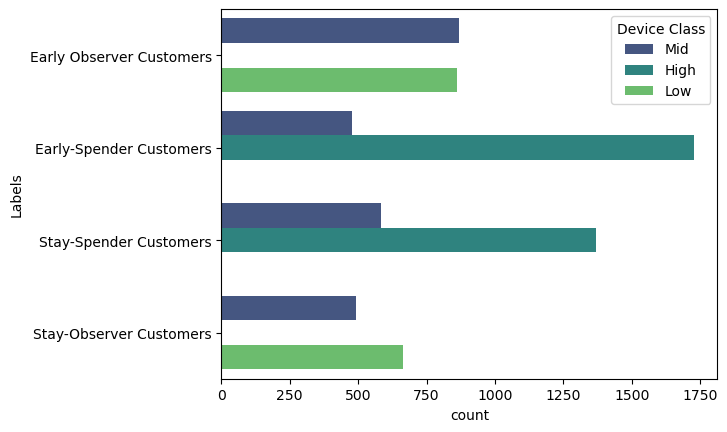

In [47]:
sns.countplot(y=test['Labels'], palette='viridis', hue=test['Device Class'])

### Combine Segment Label with Origin

In [177]:
data.columns

Index(['Customer ID', 'Monthly Purchase (Thou. IDR)',
       'CLTV (Predicted Thou. IDR)', 'Tenure Months', 'Device Class',
       'Education Product_No internet service', 'Education Product_Yes',
       'Call Center_Yes', 'Music Product_No internet service',
       'Music Product_Yes', 'Use MyApp_No internet service', 'Use MyApp_Yes',
       'Location_Jakarta', 'Games Product_No internet service',
       'Games Product_Yes', 'Video Product_No internet service',
       'Video Product_Yes', 'Payment Method_Debit',
       'Payment Method_Digital Wallet', 'Payment Method_Pulsa', 'Churn Label'],
      dtype='object')

In [178]:
# data_2 = pd.read_csv('Telco_Customer_Engineeredv1.csv')

In [179]:
# df_saved = pd.concat([data_2, df_segm_kmeans['Labels']], axis=1)

In [180]:
# df_saved['Labels'].value_counts(normalize=True)

In [181]:
# df_saved.rename(columns= {'Labels': 'Customer Segment'}, inplace=True)

In [182]:
#df_saved.to_csv('Telco_Customer_Segmentedv1.csv', index=False)

## DBSCAN

In [192]:
dbscan = DBSCAN(eps=0.1)
dbscan.fit(segmentation_std)

DBSCAN(eps=0.1)

#### Cluster Analysis

In [193]:
# We create a new data frame with the original features and add a new column with the assigned clusters for each point.
df_segm_dbscan = df.copy()
df_segm_dbscan['Segment DBSCAN'] = dbscan.labels_
# Calculate mean values for the clusters
df_segm_analysis = df_segm_dbscan.groupby(['Segment DBSCAN']).mean()
df_segm_analysis

Tenure Months  Monthly Purchase (Thou. IDR)
Segment DBSCAN                                             
-1                  41.909091                     83.044394
 0                  32.292916                     84.233864
 1                  61.500000                     50.700000

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19524\283442203.py:9: UserWarning:

The palette list has more values (4) than needed (2), which may not be intended.



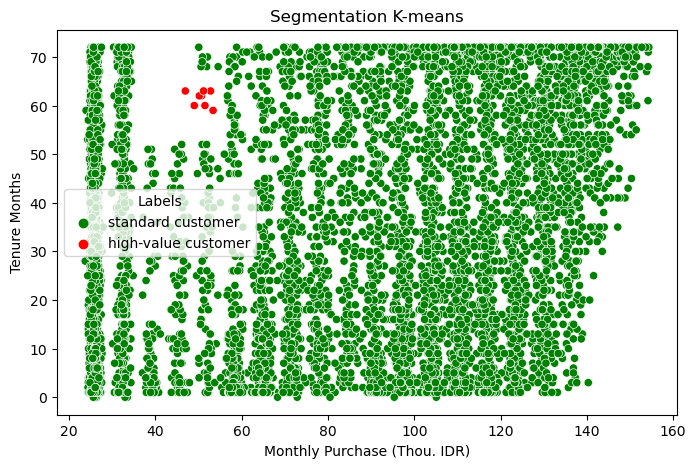

In [194]:
# Add the segment labels to our table
df_segm_dbscan['Labels'] = df_segm_dbscan['Segment DBSCAN'].map({0:'standard customer', 
                                                                  1:'high-value customer'})
# We plot the results from the K-means algorithm. 
# Each point in our data set is plotted with the color of the clusters it has been assigned to.
x_axis = df_segm_dbscan['Monthly Purchase (Thou. IDR)']
y_axis = df_segm_dbscan['Tenure Months']
plt.figure(figsize = (8, 5))
sns.scatterplot(x=x_axis, y=y_axis, hue = df_segm_dbscan['Labels'], palette = ['g', 'r', 'c', 'm'])
plt.title('Segmentation K-means')
plt.show()